<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab/blob/main/Ch_1_Heart_Failure_Predict_5%EC%9D%BC%EC%B0%A8_%EB%AC%B8%EC%A0%9C_~15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 2.68MB/s]


In [ ]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
# head 안에 수를 넣어서 원하는 만큼 출력 가능 음수를 삽입 시 마지막에서 그만큼 제외하고 출력
df.head()





,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()
#분석 결과
# 널값과 데이터타입에 문제가 있는지 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()
#수치형 데이터들의 통계를 보여 준다
# std : 표준편차 최소/최대 4분위수 50%:중앙값
# 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기



1일차 시작

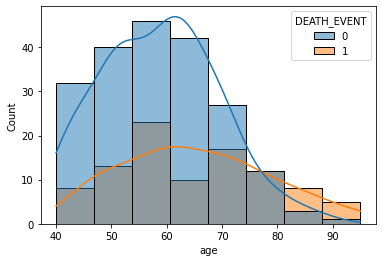

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='age', data=df, hue='DEATH_EVENT', bins=8, kde=True)
# kde는 Kernel Density Estimate 대충 밀도 그래프인듯
# hue를 사용해서 나이에 대해 DEATH_EVENT(죽은 사람의 수)를 히스토그램으로 보이기
# bins는 막대개수

In [ ]:
# loc? 행/열을 선택 
# 행번호로 선택 .iloc label이나 조건표현으로 선택 .loc
# 행이든 열이든 숫자로 location을 나타내서 Selecting or indexing 하는 방법

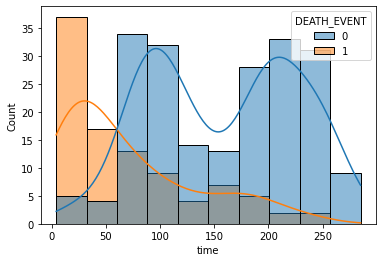

In [ ]:
sns.histplot(data=df, x='time',hue='DEATH_EVENT',kde=True)
#관찰 기간 초기에 죽은 사람이 많다 
#time이 data leakage성분이기 때문에 분석에서 제외해야 한다.

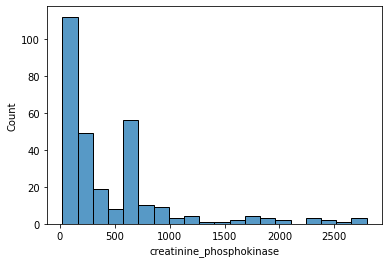

In [ ]:
# 수를 제한해서 추출? 이상값을 제외할때 사용하면 될 듯
# 데이터프레임에서 creatinine_phosphokinase 가 3000미만일 때 creatinine_phosphokinase를 히스토그램으로 표현
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

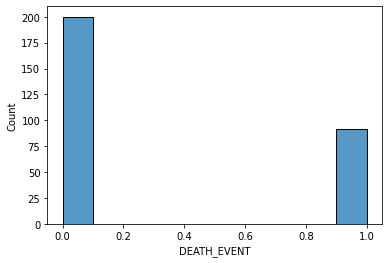

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'DEATH_EVENT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


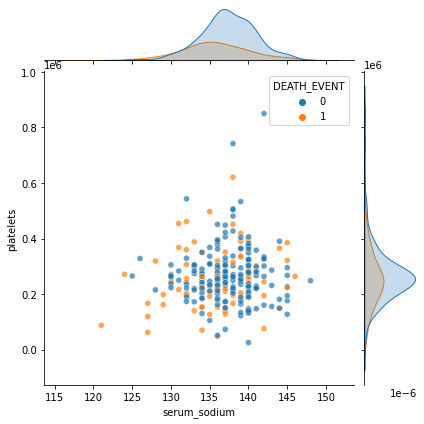

In [ ]:
#jointplot 산점도와 히스토그램을 같이 보여주는 것처럼 보인다
#산점도이므로 다른값들이 많아야 할 것 같아서 platelets,ejection_fraction,serum_sodium 등으로 해봤지만 선형적인 결과가 나오지는 않았다
# ejection_fraction 혈중 크레아틴 농도는 신장 기능에 영향을 주는 질환이나 상태를 높혀준다.
# 혈액의 정상 나트륨 농도는 1L당 140mmol 정도입니다. 저나트륨혈증은 나트륨 농도가 135mmol 미만인 경우를 의미
# alpha는 투명도
sns.jointplot( df.loc[df['serum_sodium']>120,'serum_sodium'], y='platelets', data=df, hue='DEATH_EVENT',alpha=0.7)


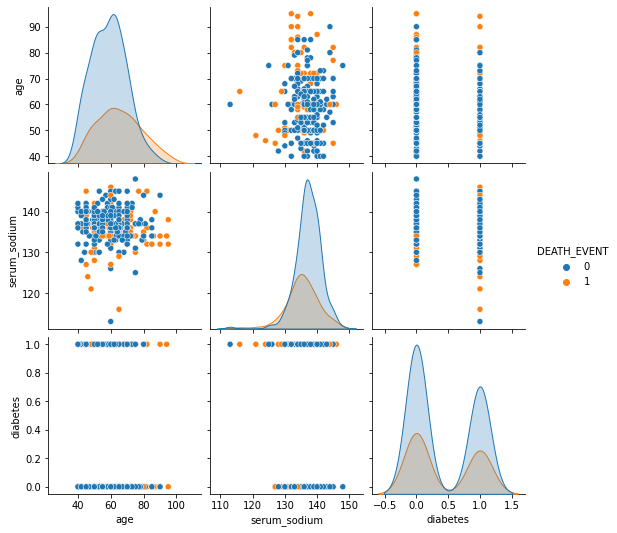

In [ ]:
# 일부 데이터프레임을 뽑아서 3x3형태로 9개의 그리드를 만든다 대각선에는 히스토그램 
# 서로 다를 변수는 산점도

dfA=df[['age','DEATH_EVENT','serum_sodium','diabetes']]
sns.pairplot(dfA,hue='DEATH_EVENT')


In [ ]:
sns.histplot(x='age',data='df', hue='DEATH_EVENT',kde=True)

ValueError: ignored

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


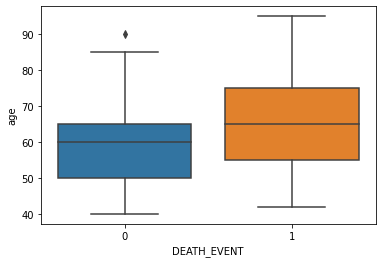

In [ ]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
# 세로 방향으로 하려면 orient='v'사용
# UserWarning: Vertical orientation ignored with only `x` specified.라고 나오는데 x->y로 바꾸니까 해결됨
# x축은 데이터의 종류가 적은것으로 하면 더 보기 편해지는 듯 하다
sns.boxplot(data=df, x='DEATH_EVENT',y='age')




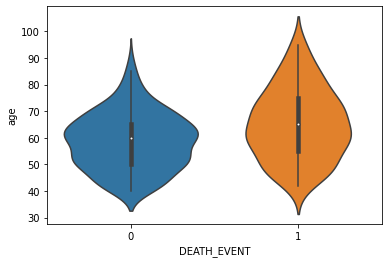

In [ ]:
# 바이올린 플롯
# 중심선을 따라 대칭인 kde 플롯이 있다
# 흰색 점은 중앙값을 나타낸다
# 중앙의 두꺼운 선은 사분위 범위를 나타낸다
# 중앙의 얇은 선은 신뢰 구간을 나타낸다
sns.violinplot(data=df, x='DEATH_EVENT',y='age')

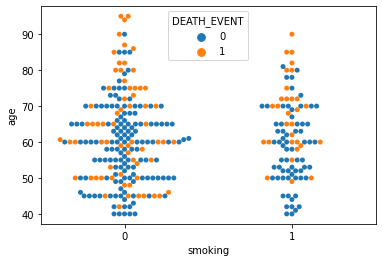

In [ ]:
# stripplot은 점을 그대로 찍어주는것 swarmplot은 점이 곂치지 않도록 옆으로 이동된다.
sns.swarmplot(data=df, x='smoking',y='age', hue='DEATH_EVENT')

## Step 3. 모델 학습을 위한 데이터 전처리


2일차

### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
# transform을 통해서 scaled 하게 되면 numpy로 바뀌게 되므로 DataFrame으로 바꿔줘야 한다
X_scaled = pd.DataFrame(data=X_scaled,index=X_num.index, columns=X_num.columns)  
# index : 행 이름 설정 columns : 열 이름 설정
X = pd.concat([X_scaled, X_cat], axis=1)
# 수치형 데이터 이후에 concat을 사용해 범주형 데이터를 붙혀주었다
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


3일차

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
# X = 전처리된 전체 데이터 y = 출력 데이터(DEATH_EVENT)
# test_size : 테스트 데이터 비율 
# stratify : Stratified sampling 무작위로 샘플링을 하는데 기존 데이터셋에서 클래스 비율을 동일하게 유지하면서 분리하는 것 대충 0과 1을 동일한 비율로 train/testset으로 분리해준다는 것 같다.
# random_state random함수의 시드값을 고정시켜준다.그래서 shuffle과 같이 사용해서 섞어도 같은 값이 나온다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, 
#                    solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)
# penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2
# dual : 이중 또는 초기 공식
# tol : 정밀도
# C : 규제 강도
# fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
# intercept_scaling : 정규화 효과 정도
# class_weight : 클래스의 가중치
# random_state : 난수 seed 설정
# solver : 최적화 문제에 사용하는 알고리즘
# max_iter : 계산에 사용할 작업 수
# multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
# verbose : 동작 과정에 대한 출력 메시지 verbose=1,2 2로 해주면 1보다 조금 더 많이 보여줌
# warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
# n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
# l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용
# https://inuplace.tistory.com/522

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

#학습 데이터가 테스트 데이터보다 정확도가 높다.

LogisticRegression(max_iter=1000)

### 문제 10. 모델 학습 결과 평가하기


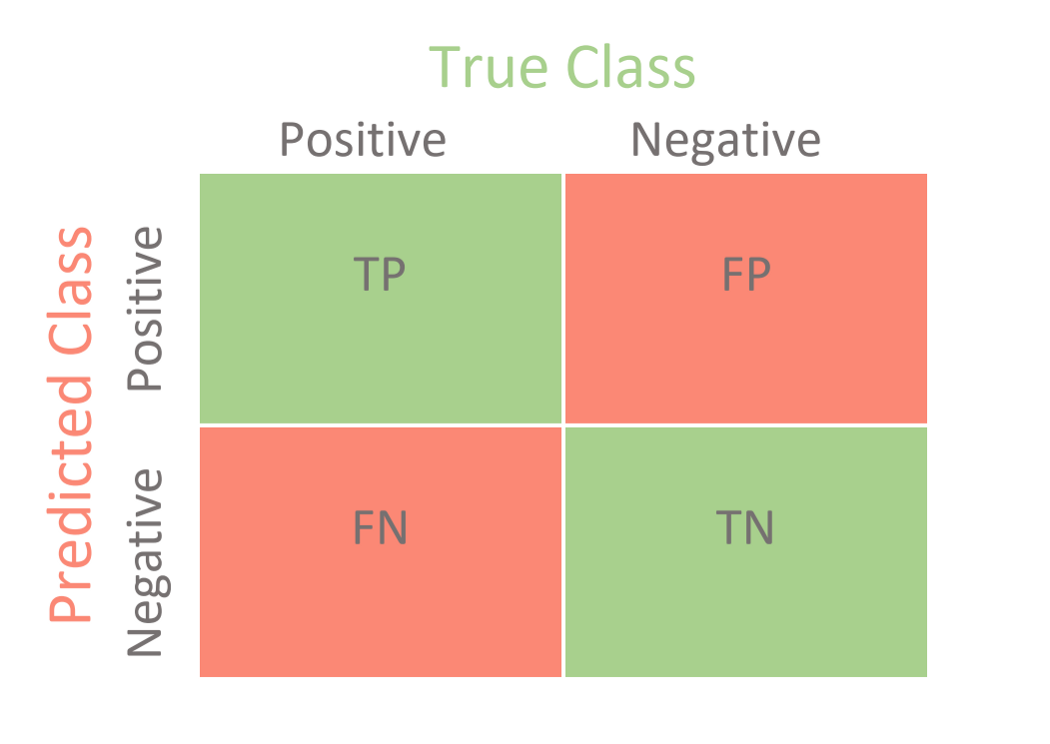

Confusion Matrix

In [ ]:
# classification_report
# precision 정밀도 : 양성 클래스라고 예측한 샘플 중 실제 양성 클레스에 속하는 샘플 
# precision=TP/(TP+FP)
# recall 재현율 : 양성 클레스에 속한 샘플 중 양성 클래스라고 예측한 샘플
# recall=TP/(TP+FN)
# accuracy 정확도 전체 샘플 중 맞게 예측한 샘플 수의 비율
# (TP+TN)/(TN+TP+FN+FP)
# f1-score precision,recall의 가중 조화평균
# 가중치가 1일떄 F1임 
# support:샘플 개수
#https://blog.naver.com/PostView.naver?blogId=hannaurora&logNo=222498671200&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
# 학습된 테스트 데이터를 predict() 메서드로 예측
pred = model_lr.predict(X_test)
# def classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report(y_test, pred))
# 90개의 데이터를 평가했을 때 82퍼센트의 정확도를 가지고 있음

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



4일차

### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier
#def __init__(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree',
# n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1,
# reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)



In [ ]:
'''
- General Parameters ( XGBoost 의 어떤 모델을 쓸거야? )

    booster='gbtree' # 트리,회귀(gblinear) 트리가 항상 # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.
            # gblinear : 선형 모델        
    
    silent=True  # running message출력안한다.
                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.

    nthread =4    # XGBoost를 실행하기 위한 병렬처리(쓰레드)
                  #갯수. 'n_jobs' 를 사용해라.

- Booster Parameters ( 모델의 조건 설정 )

    n_estimators [default = 100] : 나무의 개수

    early_stopping_rounds 
        최대한 몇 개의 트리를 완성해볼 것인지 
        valid loss에 더이상 진전이 없으면 멈춤
        과적합을 방지할 수 있음, n_estimators 가 높을때 주로 사용.

    learning_rate [default = 0.1] (=eta [default = 0.3] : 파이썬 래퍼에서 적용)
        학습 단계별로 가중치를 얼만큼 사용할지 결정/ 이전의 결과를 얼마나 반영할건지
        낮은 eta -> 낮은 가중치 -> 다음 단계의 결과물 적게 반영 -> 보수적
        일반적으로 0.01 ~ 0.2
        높은 값으로 다른 파라미터 조절하여 결정한 후, 낮춰서 최적의 파라미 결정
        * gradient boost에서는 기울기의 의미, 작으면 꼼꼼히 내려가고 크면 급하게 내려감

     min_child_weight [default = 1]
        child 에서 필요한 모든 관측치에 대한 가중치의 최소 합
        이 값보다 샘플 수가 작으면 leaf node가 되는 것
        너무 크면 under-fitting 될 수 있음 (training이 되지 못한 과소적합상태)
        CV로 조절해야함

    max_depth [default = 6]
        트리의 최대 깊이
        일반적으로 3 ~ 10  
        CV로 조절해야함
    
    gamma =0    # 노드가 split 되기 위한 loss function의 값이
                # 감소하는 최소값을 정의한다. gamma 값이 높아질 수록 
                # 알고리즘은 보수적으로 변하고, loss function의 정의
                # 에 따라 적정값이 달라지기때문에 반드시 튜닝.
                 트리에서 추가적으로 가지를 나눌지를 결정할 최소 손실 감소 값
                 값이 클수록 과적합 감소 효과
     
    subsample [default = 1] (=sub_sample : 파이썬 래퍼에서 적용)
        각 트리마다 데이터 샘플링 비율
        over-fitting 방지
        일반적으로 0.5 ~ 1     
    
    colsample_bytree=0.8   # 트리를 생성할때 훈련 데이터에서 
                           # 변수를 샘플링해주는 비율. 보통0.6~0.9

    reg_lambda [default = 1] (=lambda : 파이썬 래퍼에서 적용)
        L2 regularization(ex. 릿지) 가중치
        클수록 보수적
        가중치에 l2적용 값

    reg_alpha [default = 0] (=alpha : 파이썬 래퍼에서 적용)
        L1 regularization(ex. 라쏘) 가중치
        클수록 보수적
        특성이 매우 많은때 사용해볼만 함
        가중치에 l1규제 적용 값인듯

    scale_pos_weight [default = 1]
        데이터가 불균형할때 사용, 0보다 큰 값
        보통 값을 음성 데이터 수/ 양성 데이터 수 값으로 함
        잘못 분류할 때 패널티를 부과해서 양성과 음성비율을 비슷하게 맞추는 용도인듯

    
    objective = 'reg:linear','binary:logistic','multi:softmax',
                'multi:softprob'  # 4가지 존재.
            # 회귀 경우 'reg', binary분류의 경우 'binary',
            # 다중분류경우 'multi'- 분류된 class를 return하는 경우 'softmax'
            # 각 class에 속할 확률을 return하는 경우 'softprob'
    objective [default = reg:linear] (목적 함수)
        binary:logistic :이진 분류를 위한 로지스틱 회귀, 클래스가 아닌 예측된 확률 반환
        multi:softmax : softmax를 사용한 다중 클래스 분류, 확률이 아닌 예측된 클래스 반환
        multi:softprob : softmax와 같지만 각 클래스에 대한 예상 확률 반환
    
     eval_metric [목적 함수에 따라 디폴트 값이 다름(회귀-rmse / 분류-error)]

        rmse : root mean square error
        mae : mean absolute error
        logloss : negative log-likelihood
        error : binary classificaion error rate (임계값 0.5)
        merror : multiclass classification error rate
        mlogloss : multiclass logloss
        auc : area under the curve

    random_state =  # random number seed.
                    # seed 와 동일.
)
https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431714122&from=search&redirect=Log&widgetTypeCall=true&directAccess=false #파이썬 Scikit-Learn형식 XGBoost 파라미터
https://hwi-doc.tistory.com/entry/%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0-%EC%82%AC%EC%9A%A9%ED%95%98%EC%9E%90-XGBoost # XGBoost 이해하고 사용하자
https://nobsai.tistory.com/53 # XGBoost 간단 사용 가이드
'''

"\n- General Parameters ( XGBoost 의 어떤 모델을 쓸거야? )\n\n    booster='gbtree' # 트리,회귀(gblinear) 트리가 항상 # 더 좋은 성능을 내기 때문에 수정할 필요없다고한다.\n            # gblinear : 선형 모델        \n    \n    silent=True  # running message출력안한다.\n                 # 모델이 적합되는 과정을 이해하기위해선 False으로한다.\n\n    nthread =4    # XGBoost를 실행하기 위한 병렬처리(쓰레드)\n                  #갯수. 'n_jobs' 를 사용해라.\n\n- Booster Parameters ( 모델의 조건 설정 )\n\n    n_estimators [default = 100] : 나무의 개수\n\n    early_stopping_rounds \n        최대한 몇 개의 트리를 완성해볼 것인지 \n        valid loss에 더이상 진전이 없으면 멈춤\n        과적합을 방지할 수 있음, n_estimators 가 높을때 주로 사용.\n\n    learning_rate [default = 0.1] (=eta [default = 0.3] : 파이썬 래퍼에서 적용)\n        학습 단계별로 가중치를 얼만큼 사용할지 결정/ 이전의 결과를 얼마나 반영할건지\n        낮은 eta -> 낮은 가중치 -> 다음 단계의 결과물 적게 반영 -> 보수적\n        일반적으로 0.01 ~ 0.2\n        높은 값으로 다른 파라미터 조절하여 결정한 후, 낮춰서 최적의 파라미 결정\n        * gradient boost에서는 기울기의 의미, 작으면 꼼꼼히 내려가고 크면 급하게 내려감\n\n     min_child_weight [default = 1]\n        child 에서 필요한 모든 관측치에 대한 가중치의 최소 합\n      

In [ ]:
# XGBClassifier 모델 생성/학습
# 로지스틱이고 분류 모형이다.
model_xgb = XGBClassifier()#(objective='binary:logistic')
model_xgb.fit(X_train, y_train)#(X_train,y_train,early_stopping_rounds=10,eval_metric='error',eval_set=[(X_test, y_test)])




XGBClassifier()

### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.68      0.58      0.62        26

    accuracy                           0.80        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.79      0.80      0.79        90



### 문제 13. 특징의 중요도 확인하기


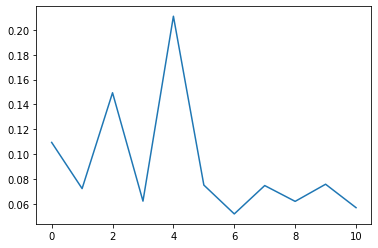

In [ ]:
plt.plot(model_xgb.feature_importances_)

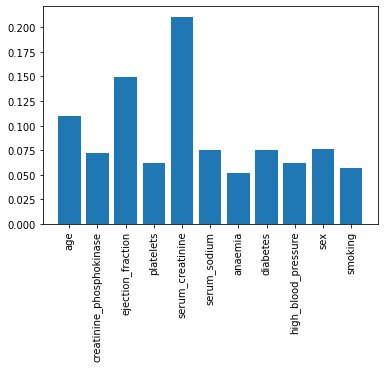

In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_) #축을 columns y축을 중요도
plt.xticks(rotation=90) #글자가 겹쳐서 90도 회전
plt.show()

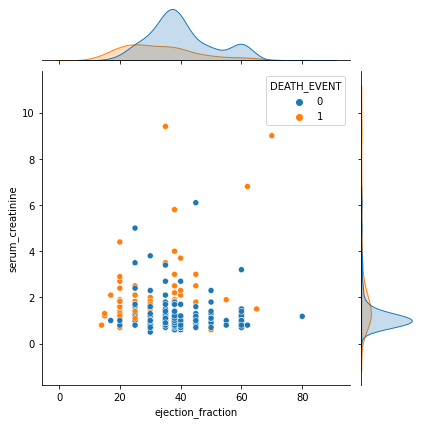

In [ ]:
#serum_creatinine/ejection_fraction 혈중 크레아틴 농도와 박출계수가 중요도가 높게 나왔으므로 
sns.jointplot(x='ejection_fraction',y='serum_creatinine',data=df,hue='DEATH_EVENT')

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


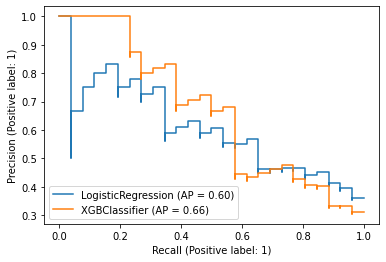

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
# recall(재현율)을 유지하면서 Precision(정밀도)을 얼마나 끌어올릴 수 있는지
# def plot_precision_recall_curve(estimator, X, y, *, sample_weight=None, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)
fig = plt.figure() #fig를 먼저 만들기
ax = fig.gca() #axe 객체 만들기
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)# 동일한 fig에 놓기
#AP값이 클수록 recall값을 증가시킬 때 Precision을 잘 끌어올릴 수 있다는 것




### 문제 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


'\nROC(Receiver Operating Characteristic) curve : 이진 분류기의 성능을 판별\n그래프가 좌상단에 붙어 있을수록 더 좋은 이진 분류기이다.\n\nhttps://angeloyeo.github.io/2020/08/05/ROC.html\nhttps://www.youtube.com/watch?v=n7EoYT5kDO4\n공돌이의 수학정리노트\n'

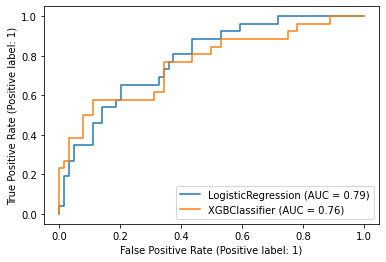

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure() 
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
'''
ROC(Receiver Operating Characteristic) curve : 이진 분류기의 성능을 판별
그래프가 좌상단에 붙어 있을수록 더 좋은 이진 분류기이다.
Fale positive rate을 낮추면서 True positive rate를 1까지 빨리 올리는 것

https://angeloyeo.github.io/2020/08/05/ROC.html
https://www.youtube.com/watch?v=n7EoYT5kDO4
공돌이의 수학정리노트
'''


